In [12]:
import numpy as np
import matplotlib.pyplot as plt
# BUG CHARLOTTE

# Problem 1: SNR
Background: You are looking for a suspected lurker: a small satellite sneaking up on a much larger communications satellite in geosynchronous earth orbit (GEO). The glare from the GEO satellite overpowers the smaller as it gets close.  

Given: Your camera will use a V-band filter with a bandpass of 80nm, as satellites reflect sunlight which is brightest in the visible. The sunlight reflecting off the GEO satellite appears at magnitude 17 per m2 in the V-band. The lurker is estimated to be the size of a basketball, therefore not very bright. The sky is very dark, but the glare from the GEO causes the background to be magnitude 14 per arcsec2. The overall detection efficiency of your telescope and camera is 25%. You can ignore read noise for now. 

---

A brief review of radiometric quantities in astronomy:
- [F] = photon/m^2/s
- [B] = photon/m^2/s/arcsec^2
- [$\Omega$] = arcsec^2


## a. How bright (in magnitude) do you estimate the lurker to be?

I'm assuming that we are being asked for the total apparent brightness of the lurker, including the signal scattered and reflected by the GEO sattelite. We can arrrive at units of magnitude for the GEO by approximating the cross-sectional area of the lurker to be the squared diameter of a basketball (75cm, source: <https://www.spalding.com.au/basketball-size-guide>)

$$A_{lurk} = 0.5625m^{2}$$

To determine the magnitude of the lurker a conversion bust be done from $mag/m^2$. First - calculate the flux (W m-2 um-1)

$$ F_{lurk} = F_{0}*10^{\frac{17}{-2.5}} = below $$

In [13]:
F0 = 9.97e10
Flurk = F0*10**(17/(-2.5))
print('Lurker flux = ',Flurk)

Lurker flux =  15801.385128837308


The lurker flux is then scaled by the area versus an equivalent unitary telescope area, and converted back to magnitude

$$F_{lurk}*A_{lurk}*\frac{1}{m^2} = F_{lurk,scale}$$
$$m_{v} = -2.5log_{10}(\frac{F_{lurk,scale}}{F_{0}})$$

In [14]:
Alurk = 0.5625
Fscal = Flurk*Alurk
mvscal = -2.5*np.log10(Fscal/F0)
print('Equivalent Magnitude for the Lurker = ',mvscal)

Equivalent Magnitude for the Lurker =  17.6246936830415


## b. What exposure time would you need on your camera to achieve an SNR of 3 if you use a 1.0m telescope for your observation, with no AO system. Give the equation for SNR in your answer

The SNR equation (ignoring read noise) is given by:
$$ SNR = \frac{FAt}{\sqrt{FAt + BAt\Omega}} $$

Solving this for the integration time term yields:
$$ t = (\frac{SNR\sqrt{FA + BA\Omega}}{FA})^2$$

We know the lurker Flux (F), telescope diameter (A = 1m), and SNR. So the Background flux must be calculated.

$$ B = F_{0}10^{\frac{17 \Omega}{-2.5}}$$

$\Omega$ is ordinarily given by the FOV of the telescope. This would be calculated by:

$$\Omega = \frac{A_{lurker}}{r^2} Steradians = 4.25 x 10^{10}\frac{A_{lurker}}{r^2} arcsec^{2} $$

The distance to the lurker $r$ is somewhat fixed (though I'm not sure of the reason) at a distance of 35,786,000 meters (source: https://www.space.com/29222-geosynchronous-orbit.html).

However the problem specifies that in the background limiting case (we have a brighter background than a lurker) the solid angle is about constant ~ 1arcsec%^2%. We will use the $\Omega$ above later in the problem.

In [17]:
SNR = 3
A = np.pi*(0.5)**2 # telescope area
O =  1 #4.25*10**(10) *(Alurk/(35786000)**2) # solid angle in as2
print('Solid Angle = ',O)
B = F0*10**(14/(-2.5))
print('Background Flux = ',B)
QE = 0.25 # Quantum Efficiency

t = (SNR*np.sqrt(QE*Fscal*A + QE*B*A*O)/(QE*Fscal*A))**2
print('Required Exposure Time = ',t)
print('Exposure time in [ms] ',t*10**3)



Solid Angle =  1
Background Flux =  250435.07722150534
Required Exposure Time =  0.15045924670789293
Exposure time in [ms]  150.45924670789293


## c. How confident are you in your measurement if you don’t detect a lurker? A detection at SNR of 3 means the signal is 3 standard deviations above the noise level. 

If you don't detect a lurker, then there was no detection. For an SNR of 3, means that there is a 0.3$\%$ chance of a missed detection. This means that I am 99.7$\%$ confident that there was not a lurker

## d.	With an AO system running, what parameter(s) change in your SNR calculation and what integration time is needed to reach a detection with an SNR of 5? 

In [19]:
SNR = 5
A = np.pi*(0.5)**2 # telescope area
O =  4.25*10**(10) *(Alurk/(35786000)**2) # solid angle in as2
print('Solid Angle = ',O)
B = F0*10**(14/(-2.5))
print('Background Flux = ',B)
QE = 0.25 # Quantum Efficiency

t = (SNR*np.sqrt(QE*Fscal*A + QE*B*A*O)/(QE*Fscal*A))**2
print('Required Exposure Time = ',t)
print('Exposure time in [ms] ',t*10**3)
# Kinda cool because the exposure time decreased considerably

Solid Angle =  1.8667456227412487e-05
Background Flux =  250435.07722150534
Required Exposure Time =  0.014332462040450933
Exposure time in [ms]  14.332462040450933


## e.	Repeat the observation on a 3m telescope with an AO system. What integration time would you need for an SNR of 5? 

In [20]:
SNR = 5
A = np.pi*(1.5)**2 # telescope area
O =  4.25*10**(10) *(Alurk/(35786000)**2) # solid angle in as2
print('Solid Angle = ',O)
B = F0*10**(14/(-2.5))
print('Background Flux = ',B)
QE = 0.25 # Quantum Efficiency

t = (SNR*np.sqrt(QE*Fscal*A + QE*B*A*O)/(QE*Fscal*A))**2
print('Required Exposure Time = ',t)
print('Exposure time in [ms] ',t*10**3)

Solid Angle =  1.8667456227412487e-05
Background Flux =  250435.07722150534
Required Exposure Time =  0.0015924957822723257
Exposure time in [ms]  1.5924957822723256


# Problem 2: Read Noise
Background: Camera sensors make the detection of faint sources difficult because of the presence of read noise. Every time the electronics read a pixel, the value has an uncertainty based on thermal processes in the semiconductor material. This noise is quantified as the standard deviation of the measured signal in electrons. Since each detected photon gives a single electron, read noise can be thought of as an uncertainty in the number of photons detected.

Given: A point source of magnitude 22 is against a sky background of magnitude of 20 per arcsec2. The detector has read noise of 3 electrons rms.


## a.	If a source is spread over a square of NxN pixels, what is the standard deviation of the read noise?
Hint: Noise is a random process. Each time a pixel is read, the uncertainty is uncorrelated with every other pixel readout. How do the standard deviations of two (or more) statistically independent random variables combine?


In [22]:
R = 3 # electrons rsm
N = 1024 # npix in one dimension (example)
Rtot = R*N**2 # summed noise contribution of each pixel
print('Total Read Noise',Rtot, 'Electrons RMS')

Total Read Noise 3145728 Electrons RMS


## b.	What is the required integration time for a sensor with non-zero read noise to yield a detection with given SNR? Your answer should be an equation. 

$$SNR^{2}(FAt + BAt\Omega + nR^{2}) = (FA)^2t^2$$
$$(FA)^2t^2 - SNR^2A(F+B\Omega)t - SNR^2nR^2 = 0$$
$$t = \frac{SNR^2(FA+BA\Omega)\pm\sqrt{SNR^4(FA+BA\Omega)^2 + 4((FA)^2)(SNR^2nR^2)}}{2(FA)^2}$$

## c.	What is the angular subtense of a pixel on the sky needed to make the lowest noise detection of this source on a 1.0m telescope with AO?

Sampling at half the nyquist limit will yield the lowest noise contribution without loosing information in our image. Assuming $\lambda = 0.545\mu m$

$$\Theta = \frac{\lambda}{2D} = 0.545e-6 radians = 0.056 arcsec$$

## d.	Given this angular pixel scale, with the AO running, what is the integration time to reach an SNR of 5? Assume we need N=5 pixels to capture the whole source. 

I'm going to assume our magnitude is given in the v-band, so I will be using the zero point flux of $F_{0} = 9.97e10$

In [30]:
F0 = 9.97e10
msrc = 22
mbak = 20
Fsrc = F0*10**(msrc/(-2.5))
Fbak = F0*(10**(mbak/(-2.5)))*(0.056)
SA = 0.056**2 # nyquist limit squared with AO
R = 3
n = 5
SNR = 5
A = np.pi*(0.5)**2

t = ((SNR**2 *A *(Fsrc+Fbak*SA))+np.sqrt((SNR**2 *A *(Fsrc+Fbak*SA))**2 + 4*((Fsrc*A)**2 *(SNR**2 *n*R**2))))/(2*(Fsrc*A)**2)

print('Integration time = ',t,' seconds')

Integration time =  0.38929708137674046  seconds
0.25783124999999996


## e.	Without the AO system, the PSF will blur. Without changing the pixel’s angular scale, how many are needed to capture the whole source? 

Without the AO system, the PSF will blur from $\frac{\lambda}{D}$ to  $\frac{\lambda}{r_{o}}$. I'll select an $r_{o} = 0.2m$ to be an approximation for a good astronomical site in the visible. The PSF is then

$$\Theta_{blur} = \frac{\lambda}{2*r_{o}} = 1.24e-6 radians = 0.258 arcsec = 4.5 pixels$$

## f.	Including these pixels, what is the integration time to reach an SNR of 5 now? 

the increase in pixel noise contributes to an increase in integration time.

In [35]:
F0 = 9.97e10
msrc = 22
mbak = 20
Fsrc = F0*10**(msrc/(-2.5))
Fbak = F0*(10**(mbak/(-2.5)))*(0.258)
SA = 0.258**2 # nyquist limit squared without AO
R = 3
n = 5*4.5 # add 4.5 pixels for each former AO-corrected pixel
SNR = 5
A = np.pi*(0.5)**2

t = ((SNR**2 *A *(Fsrc+Fbak*SA))+np.sqrt((SNR**2 *A *(Fsrc+Fbak*SA))**2 + 4*((Fsrc*A)**2 *(SNR**2 *n*R**2))))/(2*(Fsrc*A)**2)

print('Integration time = ',t,' seconds')

Integration time =  0.6957243602804812  seconds


# Problem 3: Atmosphere Characterization
Background: To accurately design a laser-guided AO system for a telescope, a site survey must be conducted to establish atmospheric characteristics. There are the Cn2 profile as well as the wind speed profile, both a function of height above the ground.  Use weighted path integrals of the Cn2 profile with respect to various quantities. For example, the jth weighted integral of Cn2 with respect to height h is given in the following equation:
$$ \int_{0}^{\infty} C_{n}^{2} h^{j} dh $$
Assume the Cn2 profile also obeys the Hufnagel-Valley form. Wind speed is given by the following formula, described as a Bufton wind profile:
$$ v(h) = v(0) + v(h_{trop})exp[-(\frac{h-h_{trop}}{s})^2] $$

Given: The following values should be used to establish the atmospheric characteristics.
- Cn2(0) = 10e-16 m e-2/3	Ground Cn2
- v(0) = 5 m/s		Ground wind speed
- htrop = 9400 m		Height of the tropopause
- s = 4800 m		Scale height of the tropopause
- v(htrop) = 15 m/s	Wind speed at the tropopause




## a.	Calculate and plot the wind speed profile from the ground to 20km. 

Text(0.5, 1.0, 'Wind Speed Profile from 0m to 2000m')

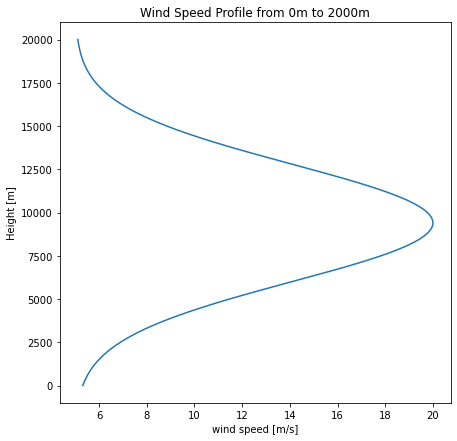

In [36]:
import numpy as np
import matplotlib.pyplot as plt

cn2 = 10e-16 # m^(-2/3)
v0 = 5 # m/s ground speed
htrop = 9400 # height
s = 4800 # scale height
vtrop = 15 # m/s

h = np.linspace(0,20e3,1000)

# Looks like a raised + shifted gaussian
vh = v0 + vtrop*np.exp(-((h-htrop)/s)**2)

plt.figure(figsize=[7,7])
plt.plot(vh,h)
plt.xlabel('wind speed [m/s]')
plt.ylabel('Height [m]')
plt.title('Wind Speed Profile from 0m to 2000m')


## b.	What is the peak wind speed? 

In [37]:
print('peak wind speed is = ',np.max(vh),' m/s')
print('Equal to the ground wind speed + the windspeed at the tropopause')

peak wind speed is =  19.99994235884419  m/s
Equal to the ground wind speed + the windspeed at the tropopause


## c.	Calculate and plot the Cn2 profile. Make the x-axis logarithmic.
Note: You will need the peak wind speed in the tropopause for this. It sets the strength of turbulence in the high-altitude shear layer. 

Using the Hufnagel-Valley model for $c_{n}^2$ we can plot the profile in termrs of altitude $h$ in km and mean wind speed $v$

$$C_n^{2}(h) = C_n^{2}(0)e^{-10h} + 2.7e-16e^{-2h/3} + 5.94e-23(\frac{v}{27})^{2}h^{10}e^{-h}  $$


(1e-18, 1e-15)

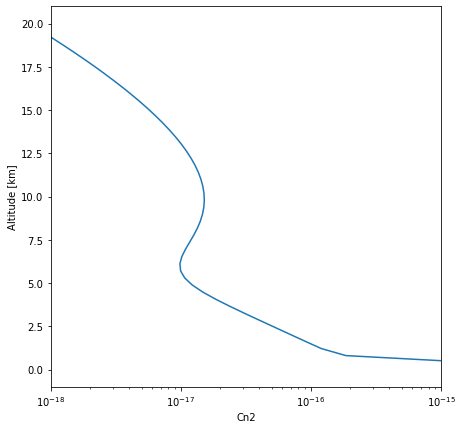

In [71]:
# relevant constants
cn20 = 10e-16 *(1e-3)**(-2/3)  # m^(-2/3) * km^(-2/3)/(1000m)^(-2/3)
h = np.linspace(0,20) # scale to km
v = 20 # scale to km

cn2 = cn20*np.exp(-10*h) + 2.7e-16*np.exp(-2*h/3) + 5.94e-23*(v/27)**2 *h**10 *np.exp(-h)

plt.figure(figsize=[7,7])
plt.plot(cn2,h)
plt.xscale('log')
plt.xlabel('Cn2')
plt.ylabel('Altitude [km]')
plt.xlim([10e-19,10e-16])

## d.	Calculate r0 at a wavelength of 500 nm. 

In [68]:
k = 2*np.pi/(500e-12) # to be in units of km-1
r0 = (0.432*k**2 *np.trapz(cn2))**(-3/5) # use trapezoidal integration
print('r0 = ',r0*1e3,' meters')

r0 =  0.11616700101988528  meters


## e.	Calculate the mean wind speed from the 5/3 weighted integral of Cn2 with respect to v(h) normalized by the integral of Cn2. 

In [84]:
# Utilize the mean value theorem to integrate the previous Cn2 profile w.r.t wind speed

norm = np.trapz(cn2) # normalization constant
vh = np.linspace(0,20) # m/s
h = np.sqrt(np.log(vh/20))*4800+htrop

cn2v = cn20*np.exp(-10*h) + 2.7e-16*np.exp(-2*h/3) + 5.94e-23*(vh/27)**2 *h**10 *np.exp(-h)

print('Mean wind speed = ',np.trapz(cn2v)/(20*norm))




Mean wind speed =  nan


<ipython-input-84-3ce0c3693610>:5: RuntimeWarning: divide by zero encountered in log
  h = np.sqrt(np.log(vh/20))*4800+htrop
<ipython-input-84-3ce0c3693610>:5: RuntimeWarning: invalid value encountered in sqrt
  h = np.sqrt(np.log(vh/20))*4800+htrop


## f.	Calculate the mean height from the normalized 5/3 weighted integral of Cn2 with respect to h. 

## g.	Using the mean wind speed and mean height, calculate the isoplanatic angle $\theta_o$ in arcseconds. 

## h.	Calculate the atmospheric time constant $\tau_o$ 

# Problem 4: PSF Behavior 
The following problem will compute the point-spread function (PSF) for an aberrated and unaberrated circular aperture. Run the following commands before starting to initialize the same random number generator. 

Matlab: >>rng(101);
Python: >>numpy.random.seed(86)

Begin by creating a circular aperture as a 2-D array. Make the array size 1024x1024 pixels and the aperture diameter 256 pixels. The aperture should look like the following image:


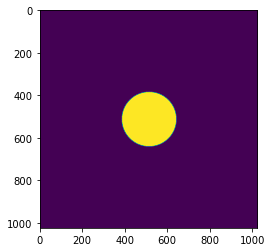

In [76]:
## CREATE CIRCULAR APERTURE
npix = 1024
ap = np.zeros((npix,npix),dtype='float')

def circ(ap,diameter):
    for xind in range(len(ap)):
        for yind in range(len(ap)):

            if np.sqrt((xind-len(ap)/2)**2+(yind-len(ap)/2)**2) <= diameter/2:

                ap[xind,yind] = 1
                
    return ap

cap = circ(ap,256)
            
plt.imshow(ap)

In [77]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 31 11:31:50 2020

@author: Charlotte E. Guthery

"""
def kolphaseClass(s):
    #phase=kolphaseClass(s)
    # Returns a random Kolmogorov phase screen of dimension s x s computed 
    # from the FT of random complex numbers with appropriate amplitudes. 
    # Screens are computed on a grid of size 2s, with a s x s piece cut out. 
    # This helps overcome the problem with this techniqe of under-representing 
    # tilt. Tandom tilts are also explicity added to give a reasonable 
    # approximation of the overall Kolmogorav structure function on all scales.
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    ph=np.zeros([s,s,2]) #initialize phase variable
    [x,y]=np.meshgrid(range(-s,s),range(-s,s))
    r=np.sqrt(np.multiply(x,x)+np.multiply(y,y)) #make a radial ordinate
    
    f1=np.random.randn(2*s,2*s) #make two sets of gaussian random numbers
    f2=np.random.randn(2*s,2*s)

    f=f1+1j*f2 #turn the two random numbers into a complex random number
    ps=np.power(r,-11/6) #Kolomogorov power spectrum amplitude
    ps[s][s]=0; #setting the centr of the power spectrum (DC term) to zero
    
    scale=15.2 #this number makes the tilts work out 

    xt=np.random.randn(2)*(scale/s) #random amplitudes for tip and tilt to 
    yt=np.random.randn(2)*(scale/s) #mitigate power spectral rolloff at low frequencies 

    #This has Kolmogorov phases in real and imaginary parts
    sc= np.fft.fft2(np.fft.fftshift(np.multiply(np.multiply(np.abs(f),ps),np.exp(1j*np.angle(f))))) 

    #seperating the real and imaginary parts
    ph[:,:,0]=np.real(sc[0:s,0:s])+xt[0]*x[0:s,0:s]+yt[0]*y[0:s,0:s]
    ph[:,:,1]=np.real(sc[0:s,0:s])+xt[1]*x[0:s,0:s]+yt[1]*y[0:s,0:s]
    
    #make the mean phase zero
    ph[:,:,0]=ph[:,:,0]-np.mean(ph[:,:,0])
    ph[:,:,1]=ph[:,:,1]-np.mean(ph[:,:,1])
    
    #pick just one of the two phase screens for present purposes scale to 
    #something that will give reasonable ansewrs on a 1024 grid with 256 pupil
    ph=ph[:,:,1]*3
    
    return ph 


## a.	Compute the incoherent PSF for this aperture assuming no aberrations. What is the full width half max (FWHM) of the central core in pixels? 
Note: The best way to do this is to compute an azimuthal average of the PSF. Do not just guess by eye. 

I maintain that taking a slice profile of the psf is almost equivalent to an azimuthal average due to the circular symmetry of the problem. After taking a fourier transform of the previously prepared pupil and zooming into the central diffraction peak, it's apparent that the values closest to half-maximum are spaced by _7 pixels_.


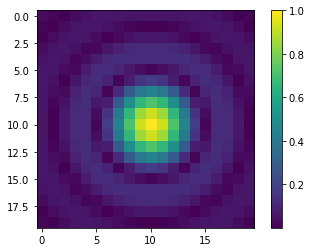

In [79]:
# a little bit of aliasing is noticeable
def FTnorm(ap):
    
    psf = np.fft.fftshift((np.abs(np.fft.fft2((ap)))))
    psf = psf/np.max(psf)
    
    return psf

psf = FTnorm(ap)

#psf = np.fft.fftshift((np.abs(np.fft.fft2((ap)))))
#psf = psf/np.max(psf) # normalize the psf by the peak
plt.imshow(psf[512-10:512+10,512-10:512+10])
plt.colorbar()
# [512-40:512+40,512-40:512+40]



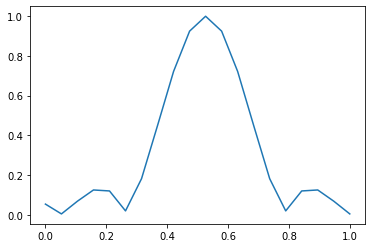

[0.05343704 0.00397557 0.06813704 0.1246569  0.11969687 0.01917864
 0.18145436 0.44951158 0.72188154 0.92490475 1.         0.92490475
 0.72188154 0.44951158 0.18145436 0.01917864 0.11969687 0.1246569
 0.06813704 0.00397557]


In [80]:
# find the cross-section
slice_psf = psf[512-10:512+10,512]
x = np.linspace(0,1,len(slice_psf))
plt.plot(x,slice_psf)
plt.show()

print(slice_psf) # width is 7 pxels

## b.	How does the width change if you reduce the diameter of the aperture to 128 pixels? Make sure to keep the array at 1024x1024 pixels. 

since the diameter is decreasing by a factor of 2 - I'd expect the FWHM to increase by a factor of 2 by the following relation from fraunhofer diffraction of a circular aperture:

$$FWHM = 1.028\frac{\lambda}{D}$$

Indeed we see (below) that the FWHM increases to 13 pixels

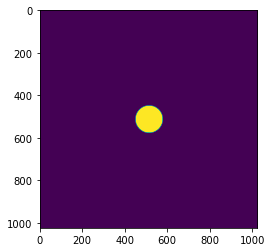

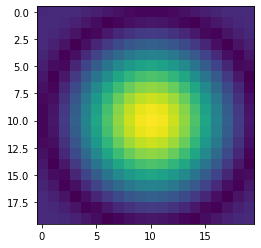

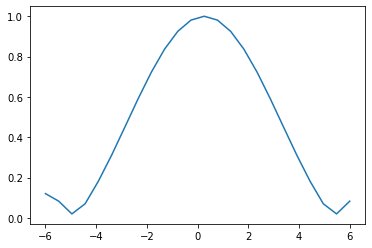

[0.44960307 0.58990732 0.72196393 0.83642777 0.92493304 0.98086879
 1.         0.98086879 0.92493304 0.83642777 0.72196393 0.58990732]
FWHM is 13 pixels


In [81]:
# re-generate the circular aperture
ap = np.zeros([npix,npix],dtype='float')
diameter = 128

cap_new = circ(ap,diameter)
plt.figure(1)
plt.imshow(cap_new)
plt.show()

plt.figure(2)
psf = FTnorm(ap)
plt.imshow(psf[512-10:512+10,512-10:512+10])
plt.show()

plt.figure(3)
slicepsf = psf[512-12:512+12,512]
plt.plot(np.linspace(-6,6,24),slicepsf)
plt.show()

print(psf[512-6:512+6,512])
print('FWHM is 13 pixels')

## c.	How would you expect the width of the PSF to change if the diameter of the aperture were doubled? 

based on the inverse relation from above I'd expect the PSF FWHM to decrease by a factor of two

## d.	Attach an image of both PSFs. You may need to display only the central portion of the array to see the details. Also include a line plot of the intensities through the brightest pixel. 

Run the kolphaseClass script to create a 1024x1024 array and assign it to an output variable phi. Use the help function to display the syntax of the routine. 


The PSFs are included in the cells above


## e. Attach the resulting image

c:\users\jaren\miniconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in power


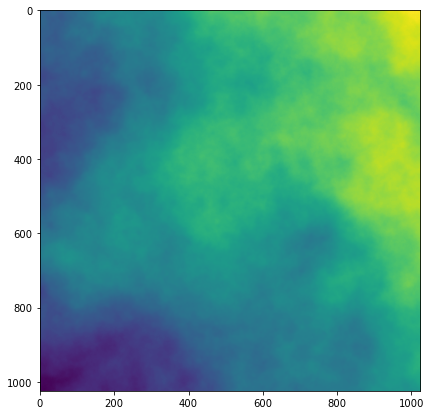

In [62]:
phi = kolphaseClass(1024)
plt.figure(figsize=[7,7])
plt.imshow(phi)

## f.	Compute the PSF for the 256 pixel aperture with phi as the phase of the electric field. Make sure to model both the amplitude and phase of the electric field. Write down the equation used to compute this PSF. Attach the image of the aberrated PSF

The equation will be the foureir transform of the circular aperture multiplied by the kolmogorov  phase  screen

$$PSF_{aberrated} = FT[P_{circk}*exp(i\phi_{kol})]$$

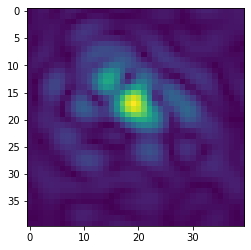

In [68]:
npix = 1024
ap = np.zeros([npix,npix],dtype='complex')
Pcirc = circ(ap,256)
PSF = FTnorm(Pcirc*np.exp(1j*phi))

# zoom in to a 20x20 pixel square
plt.imshow(PSF[512-20:512+20,512-20:512+20])

## g.	The PSF now has a speckled appearance. What is the approximate FWHM of each speckle? 

I'm anticipating that the FWHM will be proportional to $\frac{\lambda}{D}$. But we'll take a slice of the brightest speckle to determine more precisely in pixels. I was also informed by another student that this psf has the distinct appearance of a sea turtle.

In [76]:
slicepsf = PSF[512,512-4:512+6]
print(np.max(slicepsf))
print('maximum = ',np.max(slicepsf))
print('half max = ',np.max(slicepsf)/2)
print(slicepsf)
print('Full width is 7 pixels')

0.6087491103189864
maximum =  0.6087491103189864
half max =  0.3043745551594932
[0.21898796 0.34504097 0.46977724 0.56328141 0.60874911 0.60501829
 0.55909608 0.47570309 0.3557518  0.20604241]
Full width is 7 pixels


## h.	How does this compare to the FWHM value from part a? 

It's approximately the same width as the FWHM from part a - though some of the speckles are considerably more elongated in this psf. It's also worth noting that the maximum value of each speckle is less than the central airy spot from part a

## i.	Compute an aberrated PSF for 1000 different realizations of phase. Record each phase and corresponding PSF. Find the average PSF of all realizations and attach it. 
Note: Repeatedly calling kolphaseClass through a for-loop will create a different phase every time. 

Though it isn't explicitly stated, I will be using the most recent aperture diameter of 256 pixels.

<ipython-input-77-85b6f2e6bb29>:29: RuntimeWarning: divide by zero encountered in power
  ps=np.power(r,-11/6) #Kolomogorov power spectrum amplitude


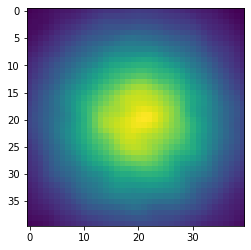

In [83]:
ntrials = 1000
ap = np.zeros([npix,npix],dtype='complex')
Pcirc = circ(ap,256)

psf_box = np.zeros([npix,npix],dtype='complex') # pre-allocate an array to toss the psfs in

for psfind in range(ntrials):
    phi = kolphaseClass(npix)
    PSF = FTnorm(Pcirc*np.exp(1j*phi))
    psf_box = PSF + psf_box
    
psf_abb = np.real(psf_box/ntrials)
plt.imshow(psf_abb[512-20:512+20,512-20:512+20])
    


## j.	What is the approximate FWHM of the averaged PSF in pixels? 

The FWHM is approximately twice that of the individual speckles

In [89]:
print('Maximum = ', np.max(psf_abb))
print('Half Maximum = ',np.max(psf_abb)/2)
print('PSF Slice = ',psf_abb[512,512-15:512+15])
print('FWHM ~=15 pixels')

Maximum =  0.27423884277559823
Half Maximum =  0.13711942138779912
PSF Slice =  [0.13490197 0.14302765 0.15181919 0.16499195 0.17813515 0.1906306
 0.20479785 0.22171086 0.23579296 0.24415809 0.24932045 0.25351838
 0.25828296 0.26392987 0.26846611 0.27254572 0.27423884 0.27299302
 0.26671219 0.25700216 0.24777299 0.23770715 0.22764855 0.21645025
 0.20339457 0.18981501 0.17806517 0.16685011 0.15555204 0.14392822]
FWHM ~=15 pixels


## k.	Calculate the structure function for each of the 1000 different phase realizations. Find the average structure function and calculate the r0 value of this dataset. 

## l.	Compute the corresponding Cn2 value. 